# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: testes de significância para proporções

Principal fonte: STEVENSON, Wiliam J.; DE FARIAS, Alfredo Alves. **Estatística aplicada à administração.** São Paulo: Harper e Row do Brasil, 1981.

---

# Testes de uma amostra para proporções

Os testes para proporções são adequados quando os dados sob análise consistem de contagens ou frequências de itens em duas ou mais classes.

Montamos o teste de hipótese do mesmo modo conforme estudado nas lições anteriores. A hipótese nula pode ser, por exemplo,

$$H_0 : p_0 = 0,20$$

Devemos então usar o valor 0,20 juntamente com o tamanho amostral $n$ para calcular $\sigma_{p_0}$. Suponhamos $n = 100$. Então

$$\sigma_{p_0} = \sqrt{\frac{(0,20)(1-0,20)}{100}} = 0,04$$

O símbolo $p_0$ é usado para denotar o valor especificado em $H_0$. O teste requer o cálculo da estatística $z$:

$$z = \frac{\text{proporção amostral} - \text{proporção alegada}}{\text{desvio padrão da proporção}} = \frac{(x/n) - p_0}{\sqrt{p_0(1-p_0)/n}}$$

---

# Exercícios

Stevenson (1981, p. 281-1)

---

# Testes de duas amostras para proporções

A finalidade de um teste de duas amostras é decidir se as duas *amostras independentes* foram extraídas de duas populações, ambas com a mesma proporção de elementos com determinada característica. O teste focaliza a diferença relativa (diferença dividida pelo desvio padrão da distribuição amostral) entre as duas proporções amostrais. 

A hipótese nula num teste de duas amostras é

$$H_0 : p_1 = p_2$$

As hipótese alternativas são

$$H_1 : p_1 \neq p_2$$
$$H_1 : p_1 > p_2$$
$$H_1 : p_1 < p_2$$

Contudo, ao contrário do teste de uma amostra, não há indicação do parâmetro populacional em $H_0$. Portanto, o valor de $p$ a ser usado vai ser obtido de forma um pouco diferente.

A estimativa combinada ("pooled") de $p$ pode ser calculada como segue

$$p = \frac{x_1 + x_2}{n_1 + n_2}$$

Este valor de $p$ é usado para calcular o desvio padrão da proporção que é semelhante às fórmulas prévias, exceto ao fato de que, agora, ele deve ser "ponderado" pelos dois tamanhos de amostra:

$$\sigma_p = \sqrt{p(1-p)[(1/n_1) + (1/n_2)]}$$

---

#### Exemplo

Pergunta-se aos eleitores de duas cidades se eles são contra ou a favor de determinada lei em curso. Para determinar se os eleitores das duas cidades diferem em termos da percentagem dos que favorecem a lei, toma-se uma amostra de 100 eleitores em cada cidade. Numa delas, 30 são a favor da lei, na outra, apenas 20.

Vamos implementar uma solução com `Julia`.

In [1]:
using Distributions, StatsPlots, StatsKit, Statistics

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1273


In [2]:
function teste_z_prop(x1, x2, n1, n2)
    p = (x1 + x2) / (n1 + n2)
    z = ((x1/n1) - (x2/n2)) / sqrt(p * (1-p) * ((1/n1) + (1/n2)))
    pvalor = ccdf(Normal(), z)
    return (round(z, digits=5), round(pvalor, digits=5))
end

teste_z_prop (generic function with 1 method)

In [3]:
teste_z_prop(30, 20, 100, 100)

(1.63299, 0.05124)

O p-valor de 0.051 indica o $z$ calculado na região de aceitação. Portanto, não rejeitamos a hipótese nula e concluímos que as duas proporções das cidades diferentes são estatisticamente iguais.

---

# Exercícios

Stevenson (1981, p. 285)

---

# Teste de $k$ amostras para proporções

A finalidade de um teste de $k$ amostras é avaliar a alegação de que $k$ amostras independentes provenham de populações que contenham a mesma proporção de determinado item. As hipóteses são

$$H_0 : \text{As proporções populacionais são todas iguais}$$
$$H_1 : \text{As proporções populacionais são não são iguais}$$

#### Exemplo

Um *shopping center* comprou e plantou 720 bulbos de tulipa de quatro cores: 200 brancos, 160 vermelhos, 240 amarelos e 120 roxos. Infelizmente nem todos floresceram. Deseja-se determinar se as falhas são *independentes* da cor (isto é, se as proporções populacionais são todas iguais) antes de adquirir novos bulbos.

Cada cor pode ser encarada como uma população e os bulbos de cada cor como uma amostra de cada população. O quadro abaixo dá os resultados dispostos numa tabela $2 \times k$: 2 filas e $k$ colunas.

| Resultados amostrais | Brancos | Vermelhos | Amarelos | Roxos | Totais |
|----------------------|---------|-----------|----------|-------|--------|
| floresceram          | 176     | 136       | 222      | 114   | 648    |
| não floresceram      | 24      | 24        | 18       | 6     | 72     |
| total plantado       | 200     | 160       | 240      | 120   | 720    |

Se a hipótese nula é, de fato, verdadeira, então as variações entre as amostras são devidas apenas ao acaso. Suponhamos inicialmente que seja esse o caso. Então as 4 amostras podem ser encaradas como amostras da mesma população. Combinando os dados amostrais, obteremos uma estimativa da verdadeira proporção populacional de bulbos que tendem a florescer. Obtemos então:

$$p = \frac{176 + 136 + 222 + 114}{200 + 160 + 240 + 120} = 90\%$$

Podemos agora utilizar esta estimativa da percentagem populacional para determinar o **número esperado de sucessos** em cada categoria, assumindo $H_0$ verdadeira. Esses valores servirão como base de comparação para os resultados observados. Vamos obter os valores esperados multiplicando o número total de bulbos plantados pela percentagem estimada da população.

$$p \times \text{número plantado} = \text{número esperado}$$

Assim:

\begin{align}
\text{brancos:} \quad & 90\% \times 200 = 180 \\
\text{vermelhos:}  \quad & 90\% \times 160 = 144\\
\text{amarelos:}  \quad & 90\% \times 240 = 216\\
\text{roxos:}  \quad & 90\% \times 120 = 108
\end{align}

Utilizando uma subtração simples, podemos obter o número esperado de falhas:

\begin{align}
\text{brancos:} \quad & 200 - 180 = 20 \\
\text{vermelhos:}  \quad & 160 - 144 = 16\\
\text{amarelos:}  \quad & 240 - 216 = 24\\
\text{roxos:}  \quad & 120 - 108 = 12
\end{align}

Em geral, é conveniente incluir tanto as frequências esperadas como as observadas numa única tabela para fins de análise. As frequências esperadas costumam estar entre parênteses.

|                 | Brancos | Vermelhos | Amarelos | Roxos |
|-----------------|---------|-----------|----------|-------|
| floresceram     | (180)   | (144)     | (216)    | (108) |
|                 | 176     | 136       | 222      | 114   |
| não floresceram | (20)    | (16)      | (24)     | (12)  |
|                 | 24      | 24        | 18       | 6     |

**É importante que cada célula da tabela seja no mínimo igual a 5!** 

O grau de diferença entre os dois conjuntos de frequência pode ser medido pela seguinte estatística:

$$\chi^2 = \sum \left[  \frac{(\text{freq. observada} - \text{freq. esperada})^2}{\text{freq. esperada}} \right]$$

Para os dados acima, a estatística calculada é $\chi^2 = 10,33$ (leia-se qui quadrado). Agora podemos comparar essa estatística de teste com um valor crítico obtido na tabela da distribuição amostral qui-quadrado para decidir pela aceitação ou não de $H_0$.



## A distribuição amostral Qui-Quadrado

Tal como a distribuição $F$, a distribuição qui-quadrado tem uma forma que depende do número de graus de liberdade associado a determinado problema. A figura abaixo ilustra distribuições qui-quadrado associadas a diferentes número de graus de liberdade.

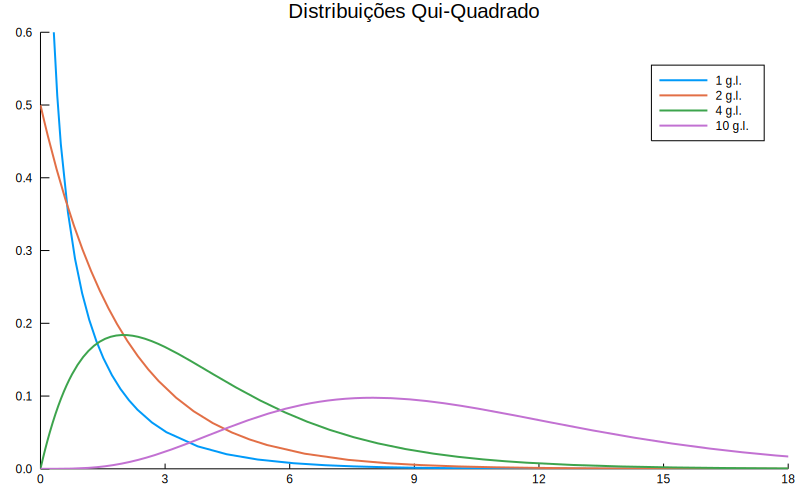

In [31]:
plot(Chisq(1), label="1 g.l.", title="Distribuições Qui-Quadrado", width=2, grid=false, size=(800,500))
plot!(Chisq(2), label="2 g.l.", width=2)
plot!(Chisq(4), label="4 g.l.", width=2)
plot!(Chisq(10), label="10 g.l.", width=2)
ylims!((0,.6))
xlims!((0,18))

Os **graus de liberdade** são função do número de células numa tabela $2 \times k$. Os graus de liberdade das colunas são o número de linhas (categorias) menos 1 ou $r - 1$. Cada linha corresponde um número de graus de liberdade igual ao número de colunas (amostras) menos 1, ou $k - 1$. O efeito líquido é que o número de graus de liberdade para a tabela é o produto de (número de linhas - 1) $\times$ (número de colunas - 1), ou $(r-1)(k-1)$. Logo, 2 linhas com 4 colunas temos $(2-1)(4-1) = 3$ graus de liberdade.

Visualmente, a zona de aceitação de $H-0$ situa-se antes do valor crítico tabulado.

In [36]:
function npdensity(z, valor_critico)
    n = size(z,2)
    for i = 1:n
        x = z[:,i]
        y = kde(x)
        desv = std(x)

        Plots.plot(range(0, stop=valor_critico, length=100),z->pdf(y,z), color=:black, fill=(0,0.5,:white), label="Aceitação", size=(1000, 500))
        Plots.plot!(range(valor_critico, stop=desv*4, length=100),z->pdf(y,z), color=:black, fill=(0,0.5,:gray), label="Rejeição")
    end
end

npdensity (generic function with 1 method)

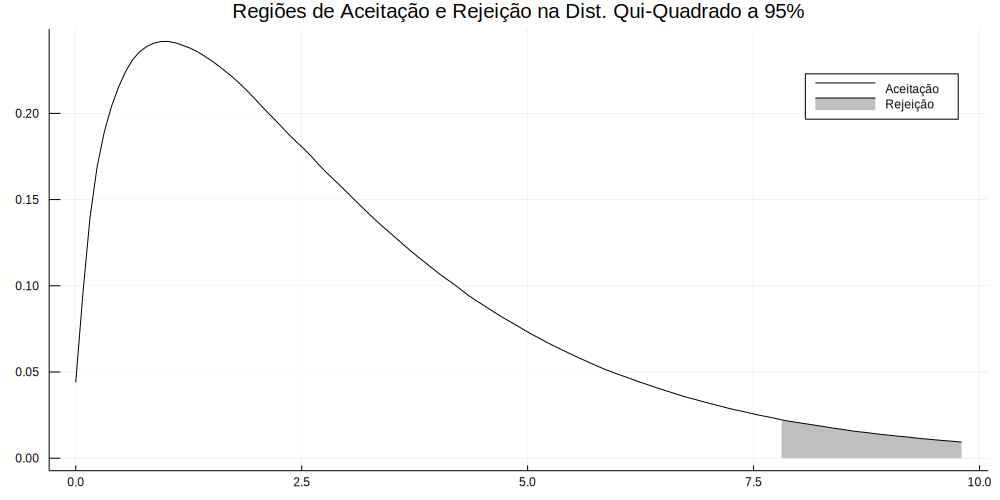

In [37]:
vetor = rand( Chisq(3),10000000)
npdensity(vetor, 7.81)
title!("Regiões de Aceitação e Rejeição na Dist. Qui-Quadrado a 95%")

Se compararmos o valor do Qui-Quadrado calculado (10,33) com o valor crítico para 95% de confiança (7,81), podemos rejeitar a hipótese nula e concluir que as proporções populacionais não são todas iguais. Entretanto, se adotarmos 99% de confiança, o valor crítico é 11,345. Ao compararmos, chegamos à conclusão de que não podemos afirmar com 99% de confiança que as proporções populacionais não sejam todas iguais. Neste caso, a estatística cairia na região de aceitação.

#### Exemplo 2

Em recente estudo para determinar se as preferências por sabor de sorvete variam conforme a região, foram coletados os seguintes dados:

| Sabor     | Nordeste | Sul | Centro-Oeste | Totais |
|-----------|----------|-----|--------------|--------|
| baunilha  | 86       | 44  | 70           | 200    |
| chocolate | 45       | 30  | 50           | 125    |
| morango   | 34       | 6   | 10           | 50     |
| outros    | 85       | 20  | 20           | 125    |
| Totais    | 250      | 100 | 150          | 500    |

Se a hipótese nula é aceita, isto sugere que a preferência pelo sabor é *independente* da região; se $H_0$ é rejeitada, a preferência pelo sabor *depende* da região. Assim, as hipóteses nula e alternativa poderiam ser também formuladas da seguinte forma:

$$H_0: \text{A preferência pelo sabor é independente da região}$$
$$H_1: \text{A preferência pelo sabor depende da região}$$

Os cálculos são feitos como se segue: primeiro estabelecemos as percentagens das linhas.

- baunilha: $200/500 = 0,40 = p_1$
- chocolate: $125/500 = 0,25 = p_2$
- morango: $50/500 = 0,10 = p_3$
- outros: $125/500 = 0,25 = p_4$

Vamos realizar os cálculos com Julia

In [40]:
# Fazendo na mão
xObs = [86 44 70;
        45 30 50;
        34 6 10;
        85 20 20]

4×3 Array{Int64,2}:
 86  44  70
 45  30  50
 34   6  10
 85  20  20

In [41]:
size(xObs)

(4, 3)

In [45]:
function chisq_test(tabela)
    nrows = size(tabela)[1]
    ncols = size(tabela)[2]
    degfreedom = (nrows-1)*(ncols-1)
    
    rowSums = [sum(tabela[i, :]) for i in 1:nrows]
    colSums = [sum(tabela[:, i]) for i in 1:ncols]
    n = sum(tabela)

    rowProps = rowSums/n
    colProps = colSums/n
    
    xExpect = [colProps[c]*rowProps[r]*n for r in 1:nrows, c in 1:ncols]
    
    testStat = sum([(tabela[r,c]-xExpect[r,c])^2 / xExpect[r,c] for r in 1:nrows, c in 1:ncols])
    
    pVal = ccdf(Chisq(degfreedom), testStat)
    
    println("Chi-squared value: ", round(testStat, digits=4))
    println("P-value: ", round(pVal, digits=4))
    
    return (round(testStat, digits=4), round(pVal, digits=4))
end

chisq_test (generic function with 1 method)

In [47]:
chisq_test(xObs)

Chi-squared value: 37.8667
P-value: 0.0


(37.8667, 0.0)

---

# Exercícios

Stevenson (1981, p. 293-4, 304-5)